In [1]:
# import libraries
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from collections import Counter

In [2]:
train_filename = "Concrete_Data.xls"
data = pd.read_excel(train_filename)

In [3]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [5]:
# remove outliers in data
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0)
# add outliers to data
data["is_outlier"] = clf.fit_predict(data)

In [6]:
Counter(data["is_outlier"])

Counter({-1: 225, 1: 805})

In [7]:
data = data[data["is_outlier"]==1]

In [8]:
data.drop("is_outlier", axis=1, inplace=True)

/var/folders/1d/d4mhd8d16rb8x5vglgfk9bv80000gn/T/ipykernel_87992/3339352730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop("is_outlier", axis=1, inplace=True)


In [9]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.074244
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.021684


In [10]:
# convert data into numpy format
data_np = data.to_numpy()
X, y = data_np[:,:-1], data_np[:,-1]

Data Viz distribution plots

Index(['Cement', 'Blast', 'Fly', 'Water', 'Superplasticizer', 'Coarse', 'Fine',
       'Age', 'Concrete'],
      dtype='object')


/var/folders/1d/d4mhd8d16rb8x5vglgfk9bv80000gn/T/ipykernel_87992/657591998.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_data.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Variable Correlation Heatmap')

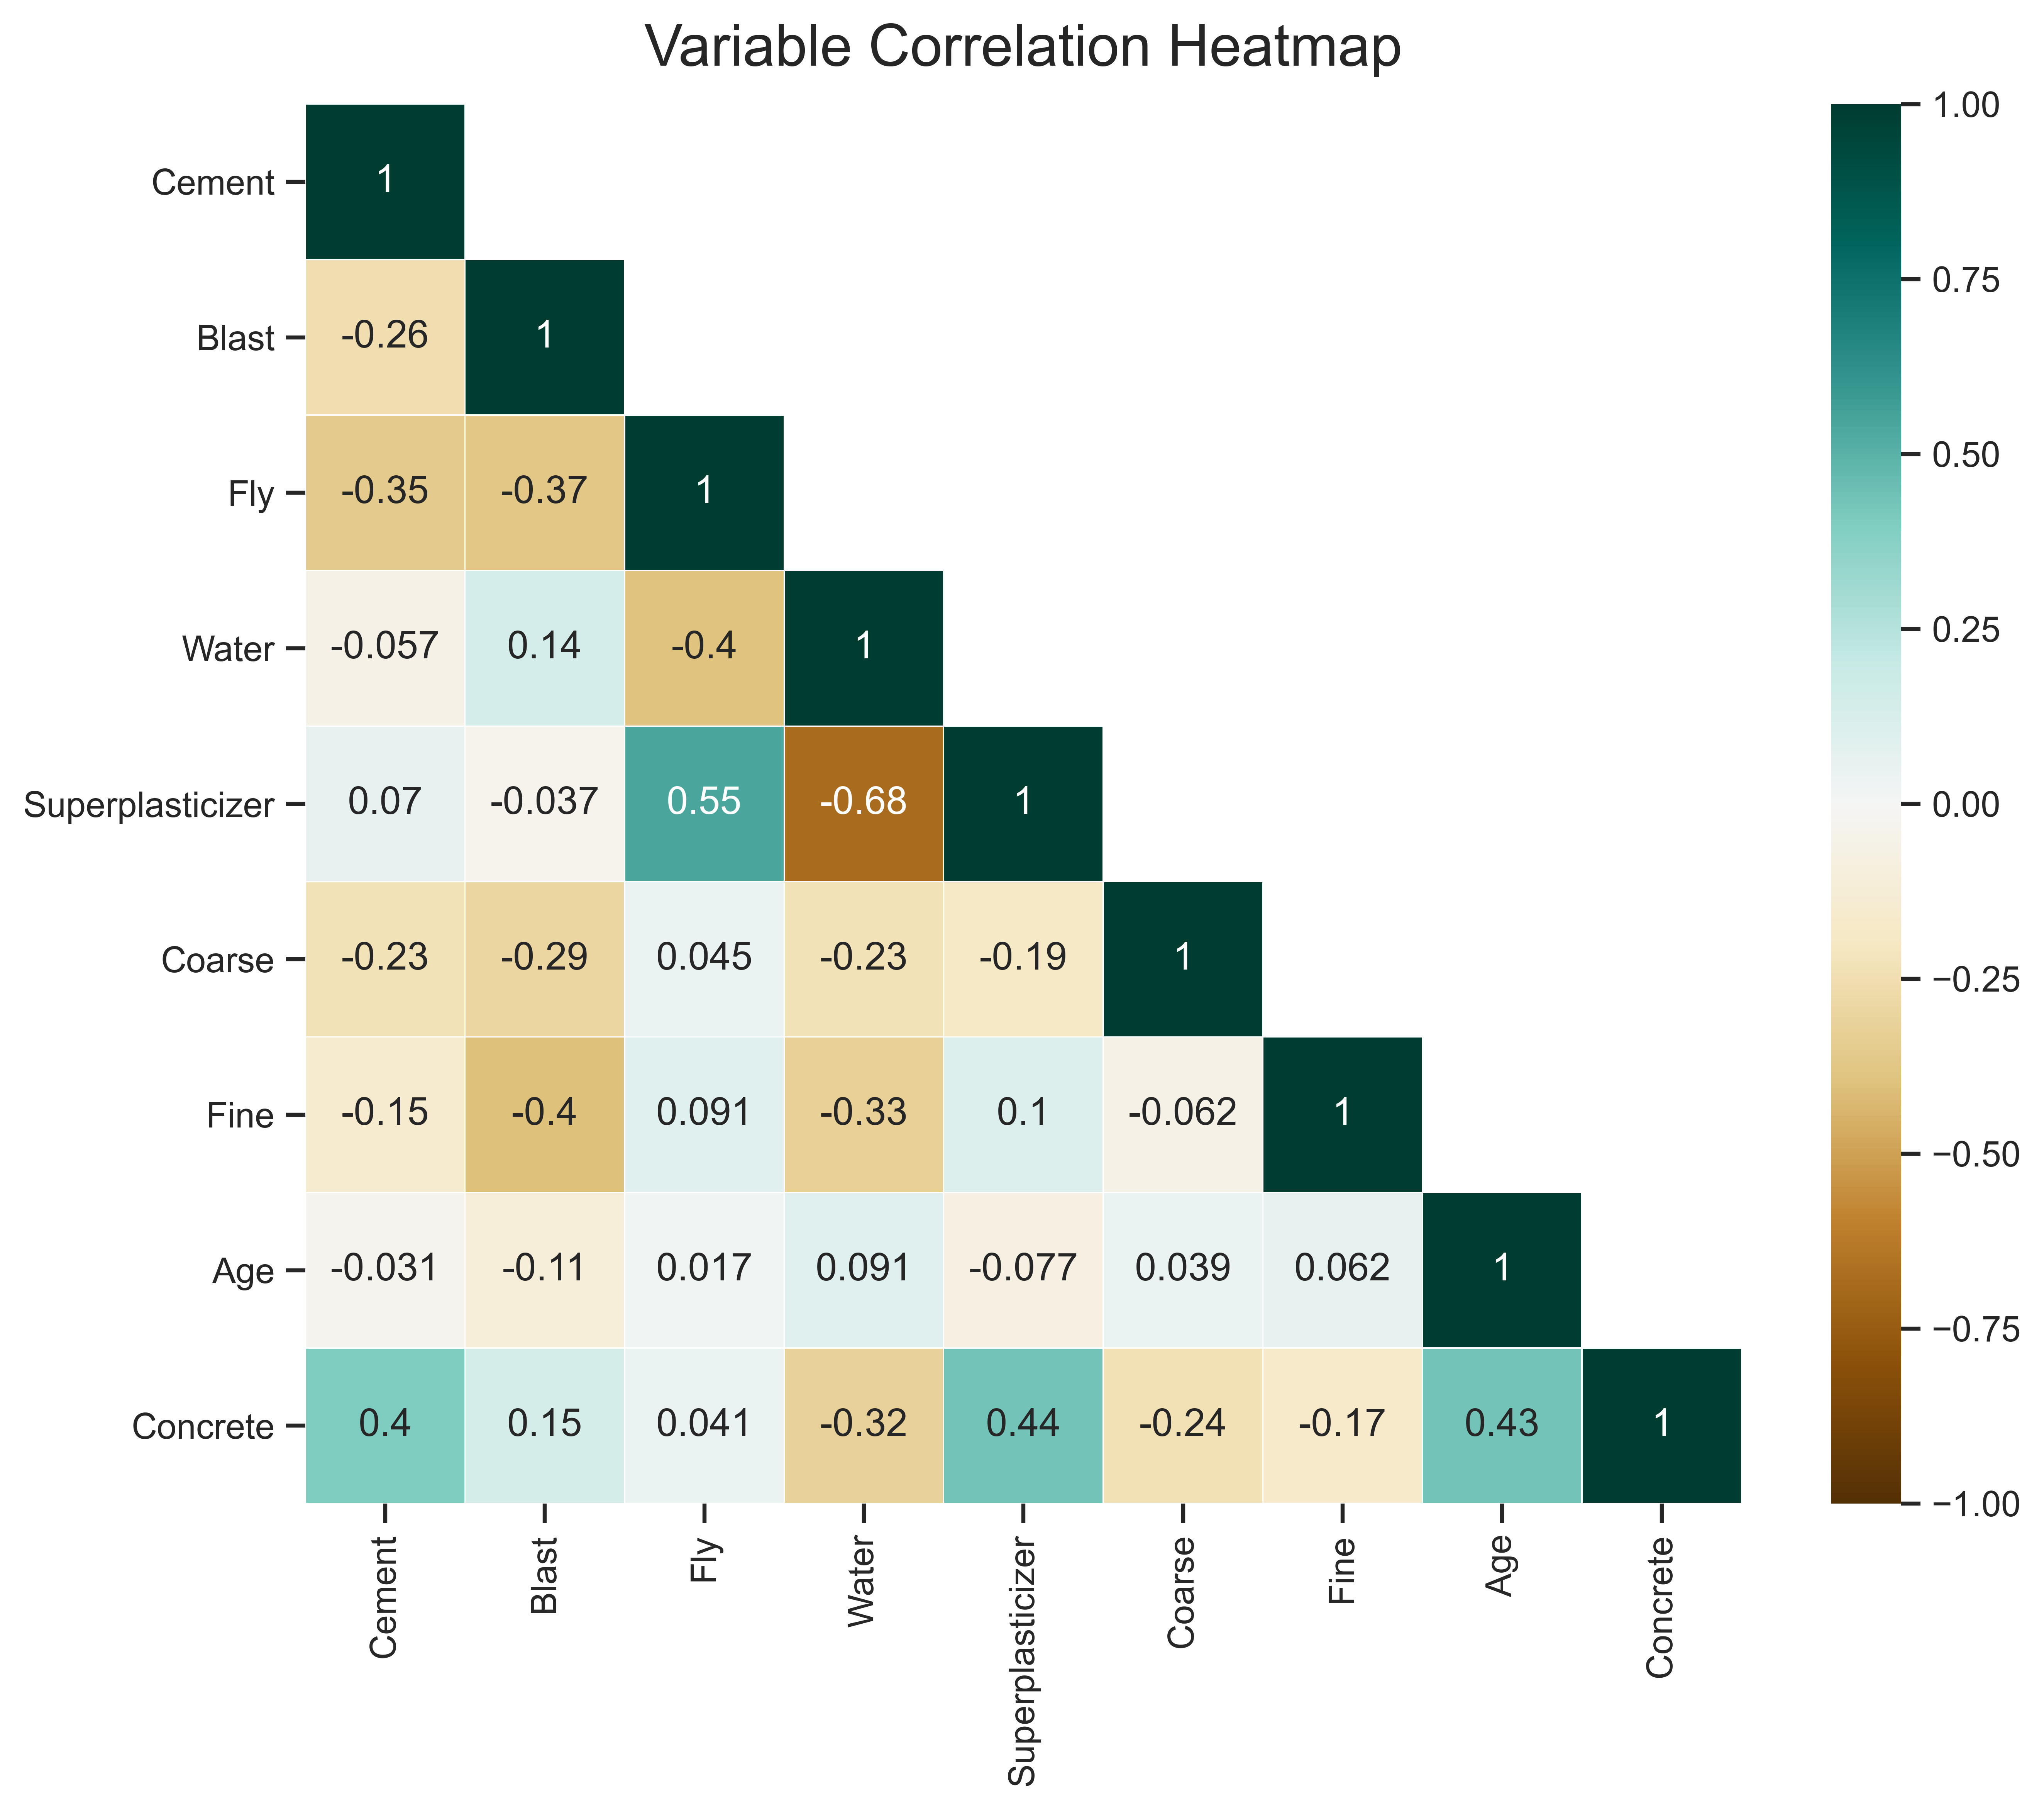

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
corr_data = data.corr()
corr_data.columns = list(map(lambda x: x.split()[0], corr_data.columns))
print(corr_data.columns)
corr_data.index = corr_data.columns
corr_data
plt.figure(figsize=(10, 8), 
           dpi = 600) 
mask = np.triu(np.ones_like(corr_data.corr(), dtype=np.bool))
mask[np.eye(mask.shape[0], dtype=bool)]= False
heatmap = sns.heatmap(corr_data, annot=True, cmap='BrBG', vmin=-1, vmax=1, mask=mask, linewidths=.3)
heatmap.set_title('Variable Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [12]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 8 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity s

In [13]:
# split data into traina nd tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47) 

In [14]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
from sklearn.metrics import mean_squared_error
def test_cv(model, X, y, n_splits=5):
       print(f"Train Set {n_splits} fold Cross Validation")
       kfold = KFold(n_splits=n_splits, shuffle=True, random_state=47)

       scores = []

       for train_index, test_index in kfold.split(X):   
              X_train, X_test = X[train_index], X[test_index]
              y_train, y_test = y[train_index], y[test_index]

              model.fit(X_train, y_train)
              
              y_pred = model.predict(X_test)
              
              scores.append(np.sqrt(mean_squared_error(y_test, y_pred))/np.std(y_test))
       
       print("Metric: (std) Normalized RMSE")
       display_scores(scores)
       

In [26]:
def test_rmse(model, X_test, y_test):
       print(f"Test set Std. Normalized RMSE")
       pred = model.predict(X_test)
       print(f"NRMSE: {np.sqrt(mean_squared_error(pred, y_test))/np.std(y_test)}")
       print(f"RMSE: {np.sqrt(mean_squared_error(pred, y_test))}")

XGBOOST FIT

In [27]:
parameters = {
       "objective":['reg:squarederror'],
       "colsample_bytree":[0.3],
       "max_depth":[5,10],
       "n_estimators":np.arange(100, 500, 100),
       "learning_rate":np.arange(0.1, 0.9, 0.3),
       "reg_lambda":np.arange(0, 20, 5),
       "gamma": np.arange(0, 200, 50)
}
clf = GridSearchCV(
       xgb.XGBRegressor(), 
       parameters,
       scoring="neg_root_mean_squared_error",
       n_jobs=-1,
       verbose=1,
       cv=4
)
clf.fit(X_train, y_train)
xg_reg = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)


Fitting 4 folds for each of 384 candidates, totalling 1536 fits
-4.541675748760791
{'colsample_bytree': 0.3, 'gamma': 0, 'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 400, 'objective': 'reg:squarederror', 'reg_lambda': 15}


In [29]:
test_cv(xg_reg, X_train, y_train)
test_rmse(xg_reg, X_test, y_test)

Train Set 5 fold Cross Validation
Metric: (std) Normalized RMSE
Scores: [0.344831824236577, 0.31302009020096316, 0.23555071950905612, 0.2862022503845449, 0.2963748725504133]
Mean: 0.295
Std: 0.036
Test set Std. Normalized RMSE
NRMSE: 0.31768968942868187
RMSE: 4.442716893416637


In [23]:
feature_important = xg_reg.get_booster().get_score(importance_type='gain')

In [24]:
for key, value in feature_important.items():
       print(key, value)


f0 21.703723907470703
f1 8.693801879882812
f2 12.596698760986328
f3 13.960447311401367
f4 16.412199020385742
f5 7.752830505371094
f6 7.286491394042969
f7 96.70392608642578


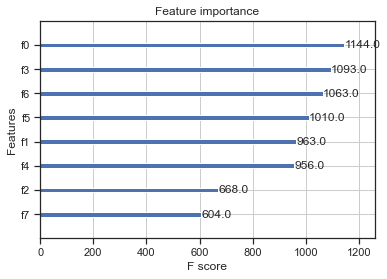

In [25]:
from xgboost import plot_importance
plot_importance(xg_reg)
plt.show()

RF Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor
parameters = {"n_estimators":np.arange(10, 200, 7)}
clf = GridSearchCV(
       RandomForestRegressor(), 
       parameters,
       scoring="neg_root_mean_squared_error",
       n_jobs=-1
)
clf.fit(X_train, y_train)
rff = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)


-5.057942272476455
{'n_estimators': 129}


In [31]:
test_cv(rff, X_train, y_train)
test_rmse(rff, X_test, y_test)

Train Set 5 fold Cross Validation
Metric: (std) Normalized RMSE
Scores: [0.3911919886568547, 0.3689385317081708, 0.29472206096480297, 0.30784723312777984, 0.3330656080310363]
Mean: 0.339
Std: 0.036
Test set Std. Normalized RMSE
NRMSE: 0.33970175703778394
RMSE: 4.750543643481626


Gaussian Process Regression

In [33]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, RationalQuadratic
kernels = [RBF(), DotProduct(), WhiteKernel(), RBF() + DotProduct(), RBF() + WhiteKernel(), DotProduct() + WhiteKernel()]
for k in kernels:
       gpr = GaussianProcessRegressor(kernel=k, alpha=1e-7)
       gpr.fit(X_train, y_train)
       print(gpr.kernel_)
       test_rmse(gpr, X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


RBF(length_scale=1e-05)
Test set Std. Normalized RMSE
NRMSE: 2.273950721567633
RMSE: 31.799959588469388
DotProduct(sigma_0=1)
Test set Std. Normalized RMSE
NRMSE: 0.5637426487685933
RMSE: 7.883633219975548
WhiteKernel(noise_level=1.33e+03)
Test set Std. Normalized RMSE
NRMSE: 2.4520912407085196
RMSE: 34.291157509347755
RBF(length_scale=1) + DotProduct(sigma_0=1)
Test set Std. Normalized RMSE
NRMSE: 0.4630482972473483
RMSE: 6.475477678700119


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


RBF(length_scale=1e+05) + WhiteKernel(noise_level=385)
Test set Std. Normalized RMSE
NRMSE: 1.2523666729066274
RMSE: 17.51366430707945
DotProduct(sigma_0=8.82) + WhiteKernel(noise_level=71.2)
Test set Std. Normalized RMSE
NRMSE: 0.5531041436033797
RMSE: 7.734859532345987


LASSO Regression

In [34]:
from sklearn.linear_model import Lasso
parameters = {"alpha":np.arange(0.01, 3.0, 0.01)}
clf = GridSearchCV(
       Lasso(), 
       parameters,
       scoring="neg_root_mean_squared_error",
       n_jobs=-1
)
clf.fit(X_train, y_train)
lasso_reg = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)


-8.501466238343246
{'alpha': 0.09999999999999999}


In [35]:
test_cv(lasso_reg, X_train, y_train)
test_rmse(lasso_reg, X_test, y_test)

Train Set 5 fold Cross Validation
Metric: (std) Normalized RMSE
Scores: [0.6064006494180995, 0.5804002281044973, 0.537468281413388, 0.530826024098811, 0.6182060301355582]
Mean: 0.575
Std: 0.035
Test set Std. Normalized RMSE
NRMSE: 0.5500392901113801
RMSE: 7.691999229233096


Support Vector Regression

In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
parameters = {
       "kernel":["poly"],
       "degree":np.arange(1,15,3),
       "C":np.arange(1,25,3),
       "epsilon": np.arange(0.1, 0.5, 0.1)
}

x_scaler = MinMaxScaler()
scaled_X_train=x_scaler.fit_transform(X_train)
scaled_X_test = x_scaler.transform(X_test)


y_scaler = MinMaxScaler()
scaled_y_train = y_scaler.fit_transform(np.array([y_train]).T)
scaled_y_test = y_scaler.transform(np.array([y_test]).T)

clf = GridSearchCV(
       SVR(), 
       parameters,
       scoring="neg_root_mean_squared_error",
       n_jobs=-1,
       verbose=1,
       cv=4
)
clf.fit(scaled_X_train, scaled_y_train)
svr_reg = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)


Fitting 4 folds for each of 160 candidates, totalling 640 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/valid

-0.0789318439389277
{'C': 1, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'}


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/valid

In [37]:
test_cv(svr_reg, scaled_X_train, scaled_y_train)
test_rmse(svr_reg, scaled_X_test, scaled_y_test)

Train Set 5 fold Cross Validation
Metric: (std) Normalized RMSE
Scores: [0.43576828424132963, 0.39178309599368993, 0.36793228238866094, 0.4464125959589417, 0.3801564338270778]
Mean: 0.404
Std: 0.031
Test set Std. Normalized RMSE


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/valid

NRMSE: 0.4007098862910129
RMSE: 0.07280870045476917
